Calculate the number of visits and coadded depth in all filters, and generate a set of combined histograms with all filters for both un-dithered and dithered versions, then compare dithered vs. nondithered directly.

In [1]:
# Import modules.
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
from lsst.sims.maf.metricBundles import (MetricBundle, 
                                         MetricBundleGroup, 
                                         makeBundlesDictFromList)

In [2]:
# Connect to databases.
runName = 'baseline2018a'
opsdb = db.OpsimDatabase(runName + '.db')

mjdcol = 'observationStartMJD'

outDir = 'allfilters_test'
resultsDb = db.ResultsDb(outDir=outDir)

Set up and run non-dithered metric bundles. Use a lower value of nside to make the notebook run faster, although at lower spatial resolution.

In [3]:
nside = 128
# Set up metrics, slicer and summaryMetrics.
m1 = metrics.CountMetric(mjdcol, metricName='Nvisits')
m2 = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=nside)
summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(),
                  metrics.MaxMetric(), metrics.MedianMetric(),
                  metrics.RmsMetric(), metrics.PercentileMetric(percentile=25),
                  metrics.PercentileMetric(percentile=75)]

# And I'll set a plotDict for the nvisits and coadded depth, because otherwise
# the DD fields throw the scale in the plots into too wide a range. (we could
# also generate plots, see this effect, then set the dict and regenerate the plots)
nvisitsPlotRanges = {
    'xMin': 0, 'xMax': 300, 'colorMin': 0, 'colorMax': 300, 'binsize': 5}
coaddPlotRanges = {
    'xMin': 24, 'xMax': 28, 'colorMin': 24, 'colorMax': 28, 'binsize': 0.02}

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filterorder = {'u': 0, 'g': 1, 'r': 2, 'i': 3, 'z': 4, 'y': 5}

In [5]:
# Create metricBundles for each filter. For ease of access later, I want to
# make a dictionary with 'nvisits[filter]' and 'coadd[filter]' first.
nvisits = {}
coadd = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' % (f)
    # Add displayDict stuff that's useful for showMaf to put things in "nice" order.
    displayDict = {
        'subgroup': 'Undithered', 'order': filterorder[f], 'group': 'Nvisits'}
    nvisits[f] = MetricBundle(
        m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
        summaryMetrics=summaryMetrics, plotDict=nvisitsPlotRanges,
        displayDict=displayDict)

    displayDict['group'] = 'Coadd'
    coadd[f] = MetricBundle(
        m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
        summaryMetrics=summaryMetrics, plotDict=coaddPlotRanges,
        displayDict=displayDict)

blistAll = []
for f in filterlist:
    blistAll.append(nvisits[f])
    blistAll.append(coadd[f])
bdict = makeBundlesDictFromList(blistAll)
# Set the metricBundleGroup up with all metricBundles, in all filters.
bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.writeAll()
bgroup.plotAll()

/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/metricBundles/metricBundle.py:64: UserWarning: Future warning - "sqlconstraint" will be deprecated in favor of "constraint" in a future release.
  warnings.warn('Future warning - "sqlconstraint" will be deprecated in favor of '


Querying database SummaryAllProps with constraint filter = "i" for columns ['fieldDec', 'observationStartMJD', 'fieldRA', 'fiveSigmaDepth']
Found 514481 visits
Running:  ['baseline2018a_Nvisits_i_HEAL', 'baseline2018a_CoaddM5_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" for columns ['fieldDec', 'observationStartMJD', 'fieldRA', 'fiveSigmaDepth']
Found 177538 visits
Running:  ['baseline2018a_Nvisits_u_HEAL', 'baseline2018a_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['fieldDec', 'observationStartMJD', 'fieldRA', 'fiveSigmaDepth']
Found 515172 visits
Running:  ['baseline2018a_Nvisits_r_HEAL', 'baseline2018a_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database S

In [6]:
print ('Nvisits --')
for f in filterlist:
    print(nvisits[f].summaryValues)
print ('Coadd --')
for f in filterlist:
    print(coadd[f].summaryValues)

Nvisits --
{'Min': 25.0, 'Mean': 77.338146742387494, 'Max': 6224.0, 'Median': 61.0, 'Rms': 242.66045897608097, '25th%ile': 57.0, '75th%ile': 64.0}
{'Min': 22.0, 'Mean': 86.266380736671323, 'Max': 2384.0, 'Median': 83.0, 'Rms': 89.931840089358587, '25th%ile': 52.0, '75th%ile': 90.0}
{'Min': 21.0, 'Mean': 189.81403305864777, 'Max': 4707.0, 'Median': 189.0, 'Rms': 188.05349528180042, '25th%ile': 75.0, '75th%ile': 206.0}
{'Min': 22.0, 'Mean': 189.55725025299986, 'Max': 4809.0, 'Median': 189.0, 'Rms': 189.449758715972, '25th%ile': 75.0, '75th%ile': 205.0}
{'Min': 24.0, 'Mean': 179.10818755722616, 'Max': 6061.0, 'Median': 176.0, 'Rms': 222.95016321502422, '25th%ile': 71.0, '75th%ile': 188.0}
{'Min': 25.0, 'Mean': 194.28707323801643, 'Max': 4747.0, 'Median': 179.0, 'Rms': 192.85088630459106, '25th%ile': 172.0, '75th%ile': 189.0}
Coadd --
{'Min': 23.807823253231092, 'Mean': 25.536631643560298, 'Max': 27.972125585681262, 'Median': 25.593438315651625, 'Rms': 0.35544394278295471, '25th%ile': 25.4

Now let's try to combine the histograms.

In [7]:
# Set more complicated plot labels directly in the bundles.
for f in filterlist:
    nvisits[f].setPlotDict({'label': '%s  %1.f/%.1f/%1.f' % (
        f, nvisits[f].summaryValues['25th%ile'],
        nvisits[f].summaryValues['Median'],
        nvisits[f].summaryValues['75th%ile'])})
    coadd[f].setPlotDict({'label': '%s %.2f/%.2f/%.2f' % (
        f, coadd[f].summaryValues['25th%ile'],
        coadd[f].summaryValues['Median'],
        coadd[f].summaryValues['75th%ile'])})

2

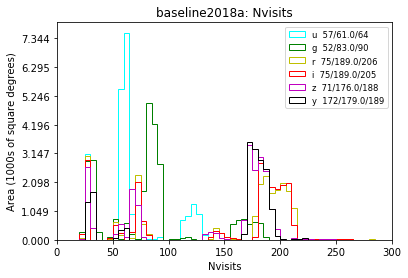

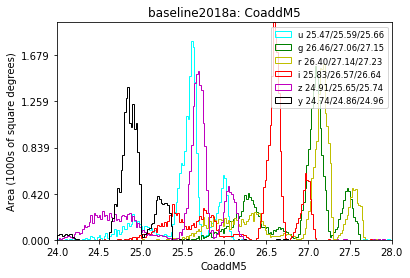

In [8]:
# Set up the plotHandler.
ph = plots.PlotHandler(outDir=outDir, resultsDb=resultsDb)
# Instantiate the healpix histogram plotter, since we'll use it a lot.
healpixhist = plots.HealpixHistogram()
ph.setMetricBundles(nvisits)
# Add min/max values to the plots, which will be used for the combo histogram for nvisits.
ph.setPlotDicts(nvisitsPlotRanges)
ph.plot(plotFunc=healpixhist)
# And generate the coadd combo histogram too.
ph.setMetricBundles(coadd)
ph.setPlotDicts(coaddPlotRanges)
ph.plot(plotFunc=healpixhist)

In [9]:
# Set up to calculate the same metrics, but using the dithered pointings.
slicer = slicers.HealpixSlicer(
    nside=nside, lonCol='ditheredRA', latCol='ditheredDec', latLonDeg=True)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [10]:
# run dithered bundles
nvisitsDith = {}
coaddDith = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' % f
    displayDict = {'subgroup': 'Dithered', 'order': filterorder[f],
                   'group': 'Nvisits'}
    nvisitsDith[f] = MetricBundle(
        m1,
        slicer,
        sqlconstraint=sqlconstraint,
        runName=runName,
        metadata='%s Dithered' % f,
        summaryMetrics=summaryMetrics,
        plotDict=nvisitsPlotRanges,
        displayDict=displayDict,
        )
    displayDict['group'] = 'Coadd'
    coaddDith[f] = MetricBundle(
        m2,
        slicer,
        sqlconstraint=sqlconstraint,
        runName=runName,
        metadata='%s Dithered' % f,
        summaryMetrics=summaryMetrics,
        plotDict=coaddPlotRanges,
        displayDict=displayDict,
        )
bListAll = []
for f in filterlist:
    bListAll.append(nvisitsDith[f])
    bListAll.append(coaddDith[f])
bdict = makeBundlesDictFromList(bListAll)
bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir,
                           resultsDb=resultsDb)
bgroup.runAll()
bgroup.writeAll()
bgroup.plotAll()

/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/metricBundles/metricBundle.py:64: UserWarning: Future warning - "sqlconstraint" will be deprecated in favor of "constraint" in a future release.
  warnings.warn('Future warning - "sqlconstraint" will be deprecated in favor of '


Querying database SummaryAllProps with constraint filter = "i" for columns ['fieldDec', 'fieldRA', 'night', 'observationStartMJD', 'fiveSigmaDepth', 'fieldId']
Found 514481 visits
Running:  ['baseline2018a_Nvisits_i_Dithered_HEAL', 'baseline2018a_CoaddM5_i_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "u" for columns ['fieldDec', 'fieldRA', 'night', 'observationStartMJD', 'fiveSigmaDepth', 'fieldId']
Found 177538 visits
Running:  ['baseline2018a_Nvisits_u_Dithered_HEAL', 'baseline2018a_CoaddM5_u_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['fieldDec', 'fieldRA', 'night', 'observationStartMJD', 'fiveSigmaDepth', 'fieldId']
Found 515172 visits
Running:  ['baseline2018a_Nvisits_r_Dithered_HEAL', 'baseline2018a_CoaddM5_r_Dithered_HEAL

In [11]:
# set plot labels for dithered bundles

for f in filterlist:
    nvisitsDith[f].setPlotDict({'label': '%s dithered  %1.f/%.1f/%1.f'
                               % (f, nvisitsDith[f].summaryValues['25th%ile'],
                                  nvisitsDith[f].summaryValues['Median'],
                                  nvisitsDith[f].summaryValues['75th%ile'])})
    coaddDith[f].setPlotDict({'label': '%s dithered %.2f/%.2f/%.2f'
                             % (f, coaddDith[f].summaryValues['25th%ile'],
                                coaddDith[f].summaryValues['Median'],
                                coaddDith[f].summaryValues['75th%ile'])})

2

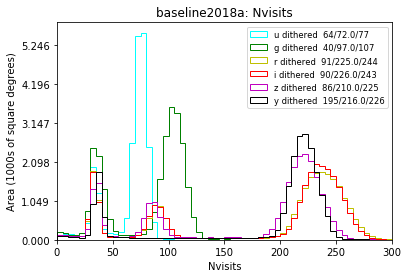

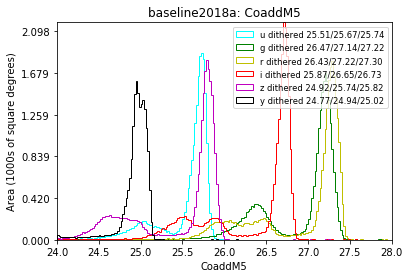

In [12]:
# Plot all filters, dithered version
ph.setMetricBundles(nvisitsDith)
# Add min/max values to the plots, which will be used for the combo histogram.
ph.setPlotDicts(nvisitsPlotRanges)
ph.plot(plotFunc=healpixhist)
ph.setMetricBundles(coaddDith)
ph.setPlotDicts(coaddPlotRanges)
ph.plot(plotFunc=healpixhist)

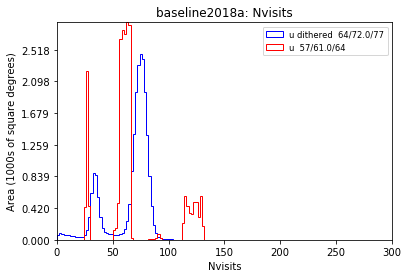

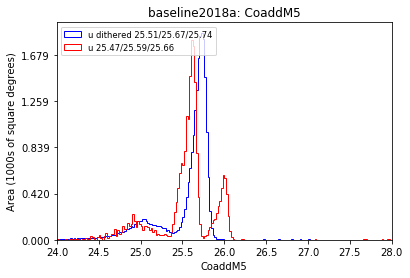

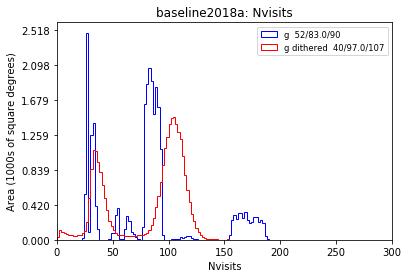

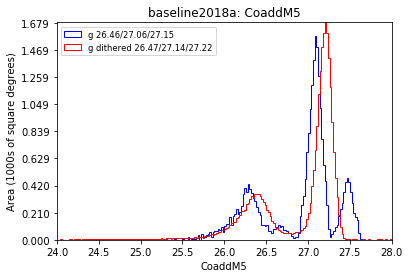

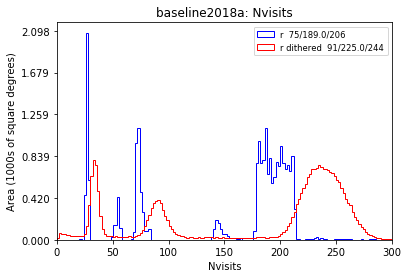

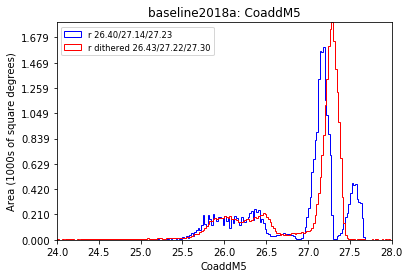

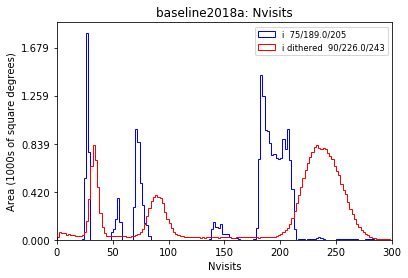

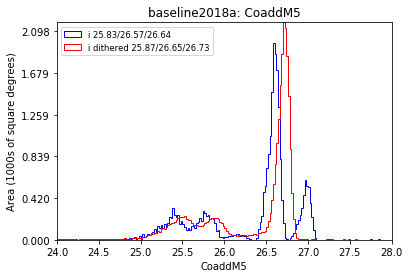

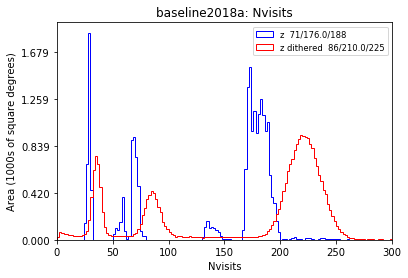

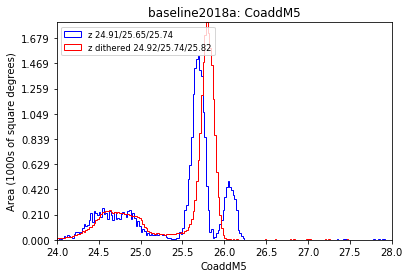

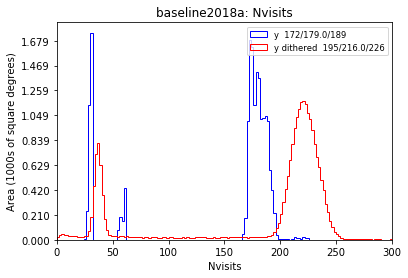

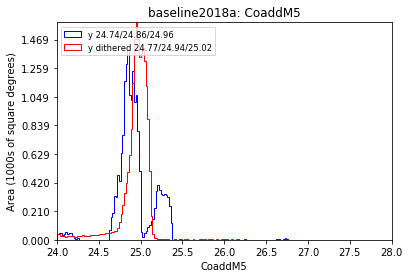

In [13]:
# plot dithered vs. non-dithered. Note that this resets xMin/xMax, so that they
# are set dynamically for each plot.
for f in filterlist:
    ph.setMetricBundles([nvisits[f], nvisitsDith[f]])
    plotDicts = [{'color': 'b'}, {'color': 'r'}]
    commonDict = {'percentileClip': 96, 'binsize': 2}
    for pd in plotDicts:
        pd.update(commonDict)
    ph.plot(plotFunc=healpixhist, plotDicts=plotDicts)
    ph.setMetricBundles([coadd[f], coaddDith[f]])
    commonDict = {'percentileClip': 96, 'binsize': 0.02,
                  'legendloc': 'upper left'}
    for pd in plotDicts:
        pd.update(commonDict)
    ph.plot(plotFunc=healpixhist, plotDicts=plotDicts)

In [14]:
# Save some information on the opsim run itself to disk.
# This helps 'showMaf' look pretty and tracks information about the opsim run.
from lsst.sims.maf.utils import writeConfigs
writeConfigs(opsdb, outDir)